In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# Linear Regression (General Linear Model) --- Single Variable

In [2]:
df=pd.DataFrame(data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6],
    'Scores': [35, 40, 50, 55, 65, 70]
})
df


,Hours_Studied,Scores
0,1,35
1,2,40
2,3,50
3,4,55
4,5,65
5,6,70


In [3]:
x_train,x_test,y_train,y_test=train_test_split(df[['Hours_Studied']],df['Scores'],test_size=0.25,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [4]:
y_pred

array([35.5, 42.5])

In [5]:
x_test

,Hours_Studied
0,1
1,2


In [6]:
r2=r2_score(y_test,y_pred)
leastSquare=mean_squared_error(y_test,y_pred)

In [7]:
print(r2)
print(leastSquare)

0.48
3.25


In [8]:
y_predSample=model.predict(df[['Hours_Studied']])

In [9]:
import matplotlib.pyplot as plt

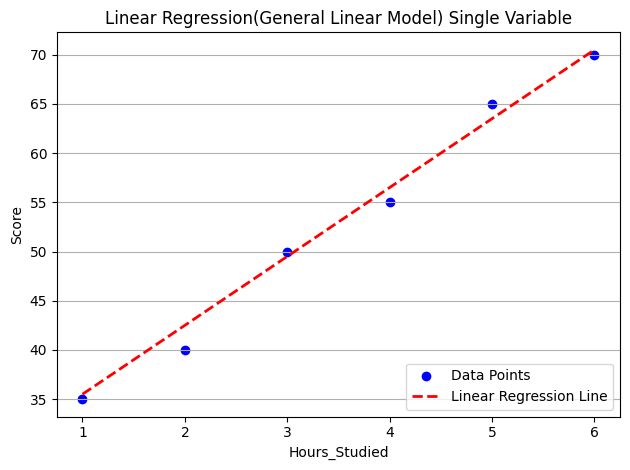

In [10]:
plt.scatter(df[['Hours_Studied']],df['Scores'],color='blue',label='Data Points')
plt.plot(df[['Hours_Studied']],y_predSample,color='red',lw=2,linestyle='--',label='Linear Regression Line')
plt.title('Linear Regression(General Linear Model) Single Variable')
plt.xlabel('Hours_Studied')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Linear Regression (General Linear Model) Multi-Variable

In [11]:
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6],
    'Sleep_Hours': [7, 6, 8, 5, 6, 7],
    'Marks': [40, 45, 55, 50, 65, 70]
}
df=pd.DataFrame(data)
df

,Hours_Studied,Sleep_Hours,Marks
0,1,7,40
1,2,6,45
2,3,8,55
3,4,5,50
4,5,6,65
5,6,7,70


In [12]:
# Sample testing 
x_train,x_test,y_train,y_test=train_test_split(df[['Hours_Studied','Sleep_Hours']],df['Marks'],test_size=0.25,random_state=42)

In [13]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predTest=model.predict(x_test)

In [14]:
x_test

,Hours_Studied,Sleep_Hours
0,1,7
1,2,6


In [15]:
y_predTest

array([38.33333333, 41.66666667])

In [16]:
# Getting Fit For Whole Data
model.fit(df[['Hours_Studied','Sleep_Hours']],df['Marks'])
y_predData=model.predict(df[['Hours_Studied','Sleep_Hours']])

In [17]:
# Prepare grid to plot the plane
x_surf, y_surf = np.meshgrid(
    np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 10),
    np.linspace(df['Sleep_Hours'].min(), df['Sleep_Hours'].max(), 10)
)
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
z_surf

array([[34.32624113, 37.72458629, 41.12293144, 44.5212766 , 47.91962175,
        51.3179669 , 54.71631206, 58.11465721, 61.51300236, 64.91134752],
       [35.33687943, 38.73522459, 42.13356974, 45.53191489, 48.93026005,
        52.3286052 , 55.72695035, 59.12529551, 62.52364066, 65.92198582],
       [36.34751773, 39.74586288, 43.14420804, 46.54255319, 49.94089835,
        53.3392435 , 56.73758865, 60.13593381, 63.53427896, 66.93262411],
       [37.35815603, 40.75650118, 44.15484634, 47.55319149, 50.95153664,
        54.3498818 , 57.74822695, 61.1465721 , 64.54491726, 67.94326241],
       [38.36879433, 41.76713948, 45.16548463, 48.56382979, 51.96217494,
        55.36052009, 58.75886525, 62.1572104 , 65.55555556, 68.95390071],
       [39.37943262, 42.77777778, 46.17612293, 49.57446809, 52.97281324,
        56.37115839, 59.76950355, 63.1678487 , 66.56619385, 69.96453901],
       [40.39007092, 43.78841608, 47.18676123, 50.58510638, 53.98345154,
        57.38179669, 60.78014184, 64.178487  

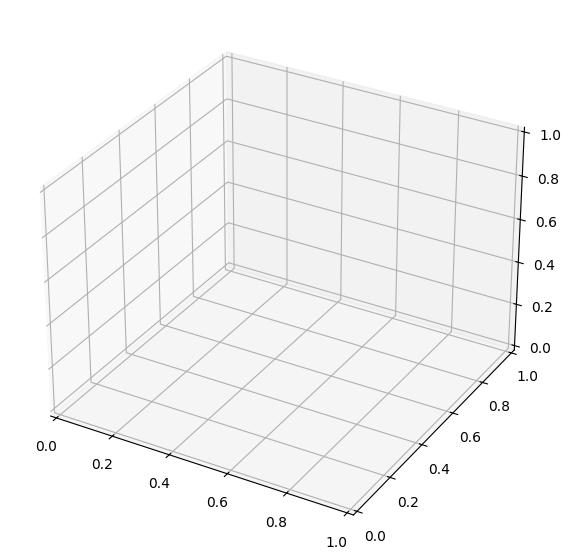

In [19]:
# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

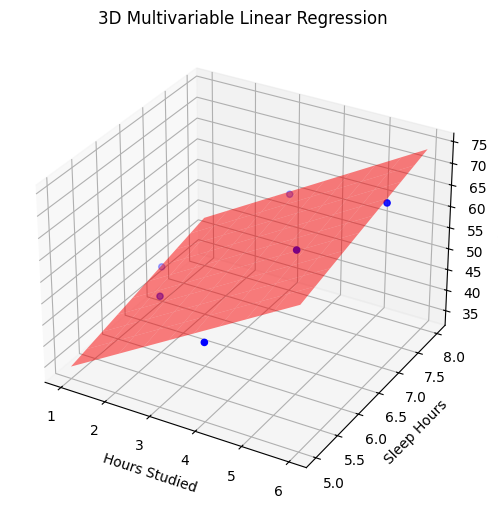

In [20]:
# Create 3D plot
fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot(111, projection='3d')
# Plot actual points
ax.scatter(df['Hours_Studied'], df['Sleep_Hours'], df['Marks'], color='blue', label='Actual Marks')
# Plot regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Marks')
ax.set_title('3D Multivariable Linear Regression')
plt.show()